In [1]:
length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
target = [1]*35  +[0]*14

In [ ]:
data = zip(length,weight, target)
data = list(data)
data

In [4]:
import pandas as pd
df = pd.DataFrame(data,columns=['length','weight','target'])
df.head()

,length,weight,target
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


데이터를 잘 섞고 적당한 비율로 분할
   - train_test_split 함수

In [5]:
Y = df.iloc[:, -1]
X = df.iloc[:, :-1]
X.shape, Y.shape

((49, 2), (49,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test ,y_train ,y_test  =  train_test_split(X,Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36, 2), (13, 2), (36,), (13,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit( x_train,y_train)
kn.score(x_test,y_test)

1.0

In [10]:
pred = kn.predict([[25,150]] )
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

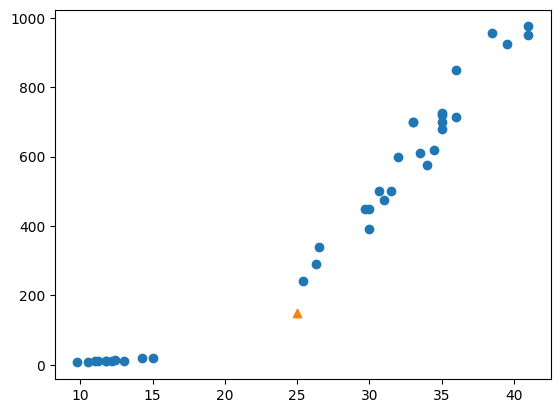

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[: ,0], x_train.iloc[: ,1])
plt.scatter(25,150,marker="^")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


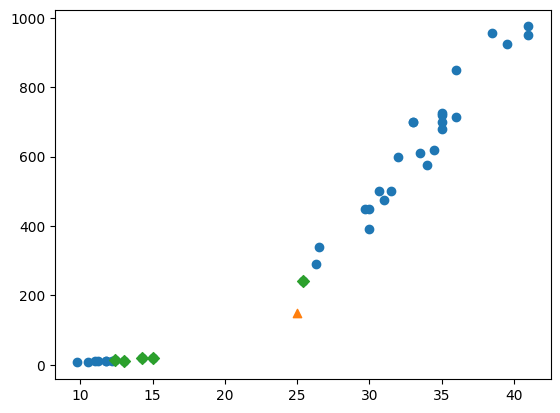

In [21]:
distance,indexes =  kn.kneighbors([[25,150]])
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[: ,0], x_train.iloc[: ,1])
plt.scatter(25,150,marker="^")
plt.scatter(x_train.iloc[indexes[0],0], x_train.iloc[indexes[0],1],marker='D')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


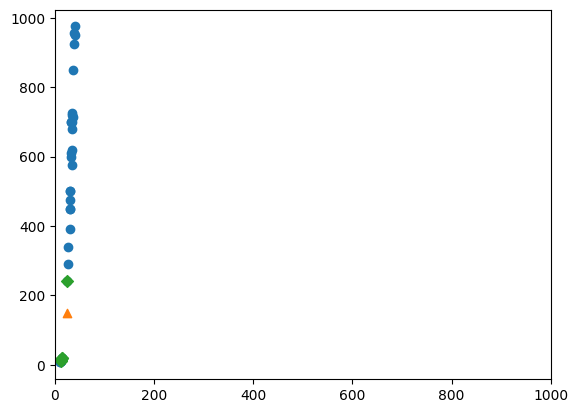

In [22]:
distance,indexes =  kn.kneighbors([[25,150]])
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[: ,0], x_train.iloc[: ,1])
plt.scatter(25,150,marker="^")
plt.scatter(x_train.iloc[indexes[0],0], x_train.iloc[indexes[0],1],marker='D')
plt.xlim(0,1000)
plt.show()

scale 조정
  - 데이터의 단위를 맞춰준다
  - 원본의 성격을 변경하지 않는 선에서 ...
  - (각데이터 - 평균) / 표준편차

In [27]:
mean = x_train.mean()
std = x_train.std()
x_train_scaled = (x_train-mean) / std
x_train_scaled.head()

,length,weight
46,-1.312444,-1.273237
26,0.774398,0.843381
10,0.394972,0.110729
38,-1.502157,-1.280713
28,0.869254,1.232135


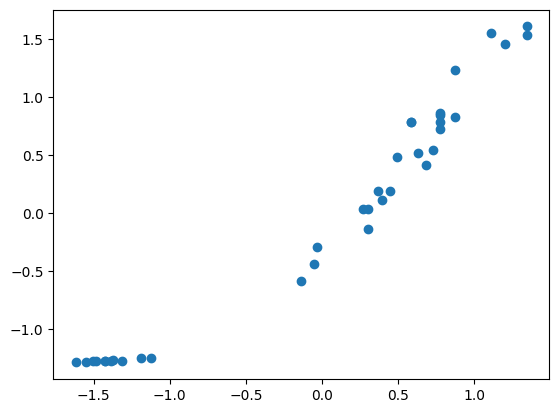

In [29]:
plt.scatter(x_train_scaled.iloc[:,0], x_train_scaled.iloc[:,1])
plt.show()

In [30]:
kn = KNeighborsClassifier()
kn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [31]:
mean_test = x_test.mean()
std_test = x_test.std()
x_test_scaled = (x_test - mean_test) / std_test

In [32]:
kn.score(x_test_scaled, y_test)

1.0

In [33]:
sampledata = ([25,150]- mean)/std

In [35]:
kn.predict([sampledata])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
distance, indexes = kn.kneighbors([sampledata])
distance, indexes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[0.27772246, 0.43644136, 0.58572401, 0.86025412, 1.00179528]]),
 array([[12, 31, 26, 28,  7]]))

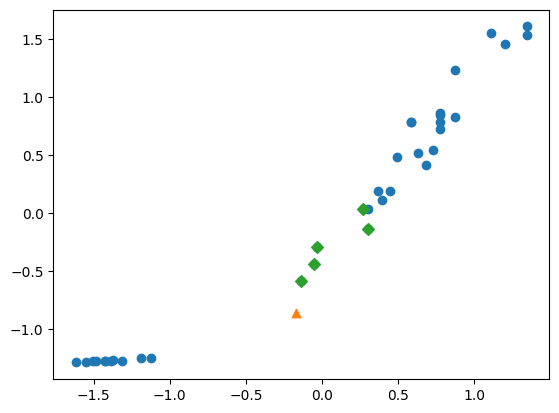

In [40]:
plt.scatter(x_train_scaled.iloc[:,0],x_train_scaled.iloc[:,1])
plt.scatter(sampledata[0],sampledata[1],marker='^')
plt.scatter(x_train_scaled.iloc[indexes[0],0], x_train_scaled.iloc[indexes[0],1], marker='D')
plt.show()

In [39]:
x_train_scaled

,length,weight
46,-1.312444,-1.273237
26,0.774398,0.843381
10,0.394972,0.110729
38,-1.502157,-1.280713
28,0.869254,1.232135
33,1.343536,1.605937
48,-1.122731,-1.250210
5,0.271658,0.035968
44,-1.388330,-1.273237
47,-1.189131,-1.250808
